In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
# Load the datase'
netflix_data = pd.read_csv('/Users/karthikeya/Desktop/Netflix_Dataset.csv')

In [4]:
# Step 1: Remove duplicates
netflix_data = netflix_data.drop_duplicates()

In [5]:
# Step 2: Handle missing values
# Fill missing 'director' and 'cast' with 'Unknown'
netflix_data['director'] = netflix_data['director'].fillna('Unknown')
netflix_data['cast'] = netflix_data['cast'].fillna('Unknown')

# Fill missing 'country' with 'Unknown'
netflix_data['country'] = netflix_data['country'].fillna('Unknown')

# Drop rows where 'date_added', 'rating', or 'duration' are missing (small proportion)
netflix_data = netflix_data.dropna(subset=['date_added', 'rating', 'duration'])

In [6]:
# Drop rows with any missing values across the entire dataset
netflix_data = netflix_data.dropna()

# Verify if there are any remaining missing values
print(netflix_data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [7]:
print(netflix_data['release_year'].describe())

count    8790.000000
mean     2014.183163
std         8.825466
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


<Axes: ylabel='release_year'>

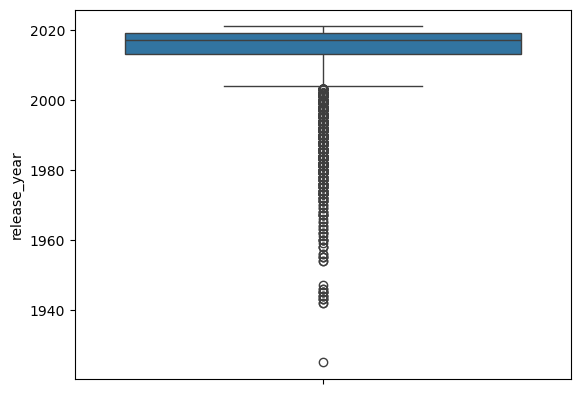

In [8]:
import seaborn as sns
sns.boxplot(netflix_data['release_year'])

In [9]:
# Remove rows where release_year is below a threshold
netflix_data = netflix_data[netflix_data['release_year'] >= 1980]

In [10]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(netflix_data['release_year'])

# Use .loc to replace outliers with the median
median_year = netflix_data['release_year'].median()
netflix_data.loc[abs(z_scores) >= 3, 'release_year'] = median_year

In [11]:
netflix_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [12]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
netflix_data.shape[0]

8668

In [14]:
# Step 3: Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Step 4: Handle outliers in 'release_year'
# Assuming outliers are values outside the range of logical release years for Netflix (e.g., 1920 to current year)
current_year = pd.Timestamp.now().year
netflix_data = netflix_data[(netflix_data['release_year'] >= 1920) & (netflix_data['release_year'] <= current_year)]

In [15]:
# Step 5: Standardize 'rating'
# Fill uncommon ratings with 'Unrated'
common_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'PG', 'PG-13', 'R', 'TV-Y', 'TV-Y7', 'NR', 'TV-G']
netflix_data['rating'] = netflix_data['rating'].apply(lambda x: x if x in common_ratings else 'Unrated')

In [16]:
# Check unique values in categorical columns
unique_values = {
    'type': netflix_data['type'].unique(),
    'rating': netflix_data['rating'].unique(),
    'country': netflix_data['country'].nunique(),
}

# Distributions of numeric columns
release_year_distribution = netflix_data['release_year'].value_counts().sort_index()
release_year_distribution

release_year
1995      25
1996      24
1997      38
1998      36
1999      39
2000      37
2001      45
2002      51
2003      59
2004      64
2005      80
2006      96
2007      88
2008     135
2009     152
2010     192
2011     185
2012     236
2013     286
2014     352
2015     555
2016     901
2017    1271
2018    1146
2019    1030
2020     953
2021     592
Name: count, dtype: int64

In [17]:
# Distribution Analysis
#1 Count Movies vs TV Shows
type_counts = netflix_data['type'].value_counts()
type_counts

type
Movie      6013
TV Show    2655
Name: count, dtype: int64

In [18]:
#2 Ratings distribution
rating_distribution = netflix_data['rating'].value_counts()
rating_distribution

rating
TV-MA      3189
TV-14      2122
TV-PG       837
R           784
PG-13       486
TV-Y7       333
TV-Y        306
PG          274
TV-G        217
NR           77
Unrated      43
Name: count, dtype: int64

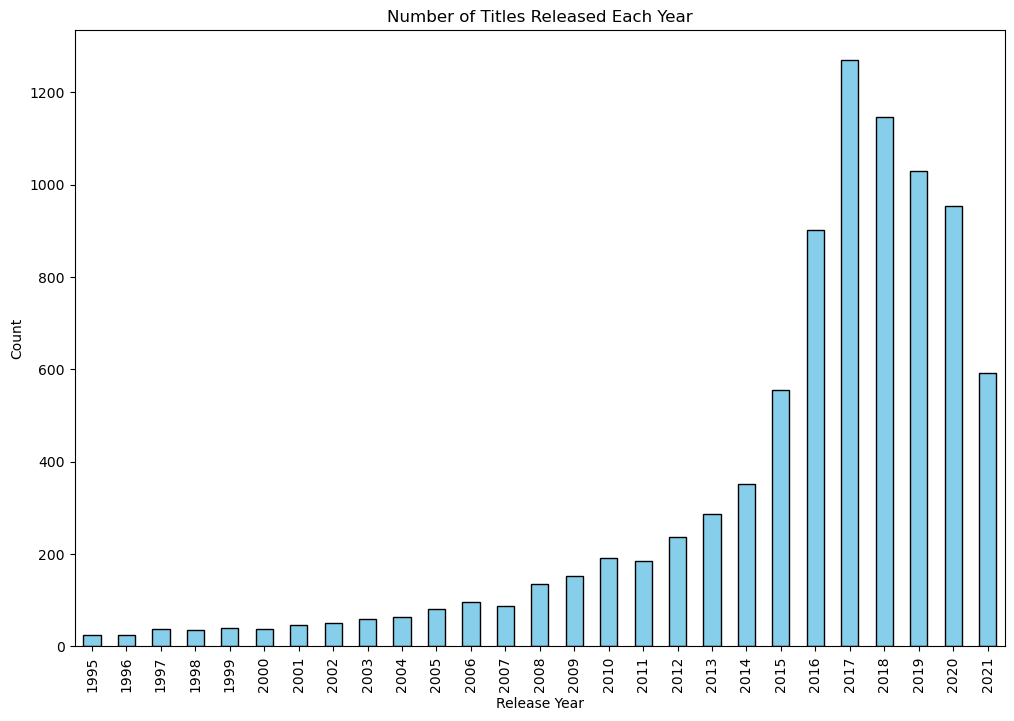

In [19]:
#3 Release year trend
plt.figure(figsize=(12, 8))
release_year_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

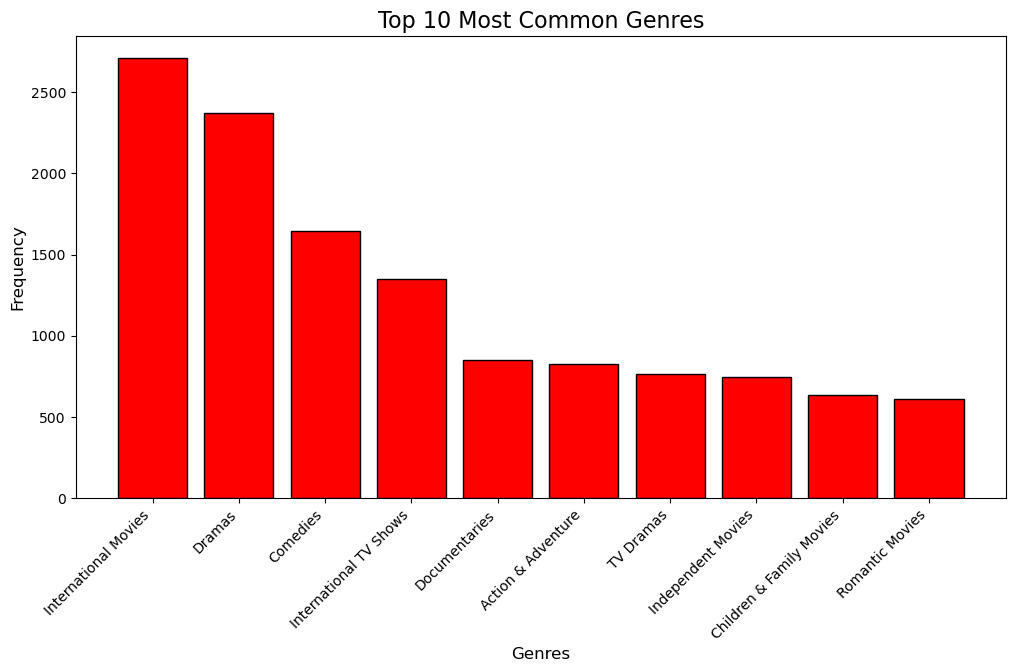

Genre Frequency Analysis:
                           Genre  Count
0           International Movies   2710
1                         Dramas   2374
2                       Comedies   1648
3         International TV Shows   1347
4                  Documentaries    852
5             Action & Adventure    829
6                      TV Dramas    762
7             Independent Movies    748
8       Children & Family Movies    635
9                Romantic Movies    608
10                     Thrillers    575
11                   TV Comedies    570
12                Crime TV Shows    469
13                      Kids' TV    447
14                    Docuseries    394
15             Romantic TV Shows    370
16              Music & Musicals    366
17                 Horror Movies    352
18               Stand-Up Comedy    342
19                    Reality TV    255
20              British TV Shows    250
21              Sci-Fi & Fantasy    242
22                 Sports Movies    217
23            

In [20]:
# Split genres into a list and count occurrences
all_genres = netflix_data['listed_in'].str.split(', ').explode()
genre_counts = Counter(all_genres)

# Convert to DataFrame for easy plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot top 10 genres
plt.figure(figsize=(12, 6))
plt.bar(genre_df['Genre'][:10], genre_df['Count'][:10], color='red', edgecolor='black')
plt.title('Top 10 Most Common Genres', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Display genre counts as a table
# Reset index for a clean display
genre_df = genre_df.reset_index(drop=True)

# Display genre frequency table
print("Genre Frequency Analysis:")
print(genre_df)

In [21]:
# Total number of titles
total_titles = genre_df['Count'].sum()
total_titles

18984

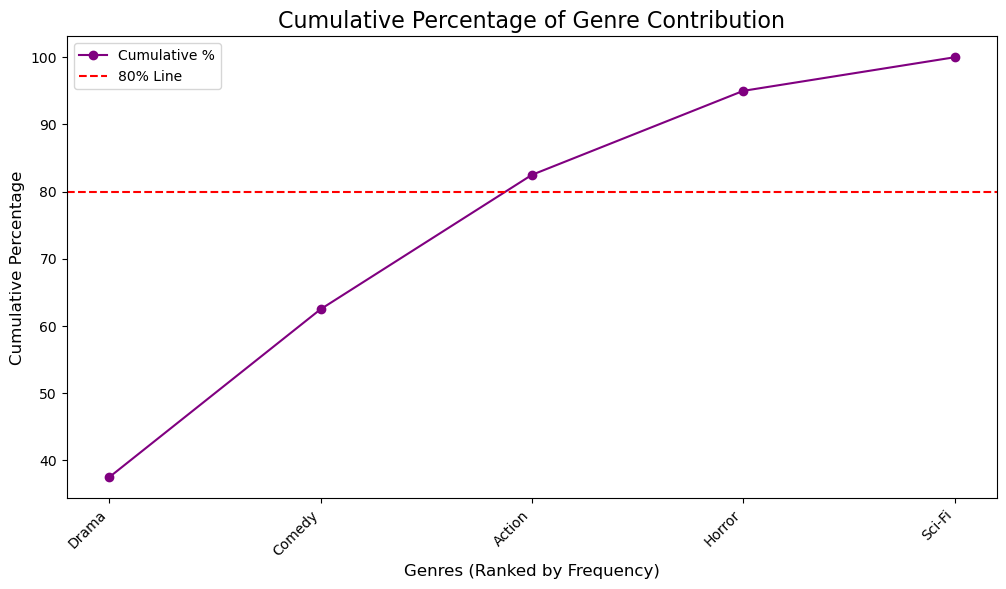

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample genre data (replace with your actual data)
data = {'Genre': ['Drama', 'Comedy', 'Action', 'Horror', 'Sci-Fi'],
        'Count': [150, 100, 80, 50, 20]}
genre_df = pd.DataFrame(data)

# Sort genres by frequency
genre_df = genre_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Calculate cumulative percentage
genre_df['Cumulative_Percentage'] = genre_df['Count'].cumsum() / genre_df['Count'].sum() * 100

# Plot cumulative percentage to understand diversity
plt.figure(figsize=(12, 6))
plt.plot(genre_df['Cumulative_Percentage'], marker='o', color='purple', label='Cumulative %')
plt.axhline(y=80, color='red', linestyle='--', label='80% Line')
plt.title('Cumulative Percentage of Genre Contribution', fontsize=16)
plt.xlabel('Genres (Ranked by Frequency)', fontsize=12)
plt.ylabel('Cumulative Percentage', fontsize=12)
plt.xticks(range(len(genre_df)), genre_df['Genre'], rotation=45, ha='right')
plt.legend()
plt.show()


In [23]:
# Content Strategy: Top Genres by Type (Movies vs TV Shows)
# Group data by type and genre
netflix_data['genres'] = netflix_data['listed_in'].str.split(', ')
exploded_genres = netflix_data.explode('genres')
content_type_genre = exploded_genres.groupby(['type', 'genres']).size().unstack(fill_value=0)
content_type_genre 

genres   Action & Adventure  Anime Features  Anime Series  British TV Shows  \
type                                                                          
Movie                   829              70             0                 0   
TV Show                   0               0           174               250   

genres   Children & Family Movies  Classic & Cult TV  Classic Movies  \
type                                                                   
Movie                         635                  0              45   
TV Show                         0                 21               0   

genres   Comedies  Crime TV Shows  Cult Movies  ...  TV Action & Adventure  \
type                                            ...                          
Movie        1648               0           60  ...                      0   
TV Show         0             469            0  ...                    167   

genres   TV Comedies  TV Dramas  TV Horror  TV Mysteries  TV Sci-Fi & Fantasy  \
type                                                                            
Movie              0          0          0             0                    0   
TV Show          570        762         75            98                   82   

genres   TV Shows  TV Thrillers  Teen TV Shows  Thrillers  
type                                                       
Movie           0             0              0        575  
TV Show        13            57             69          0  

[2 rows x 42 columns]

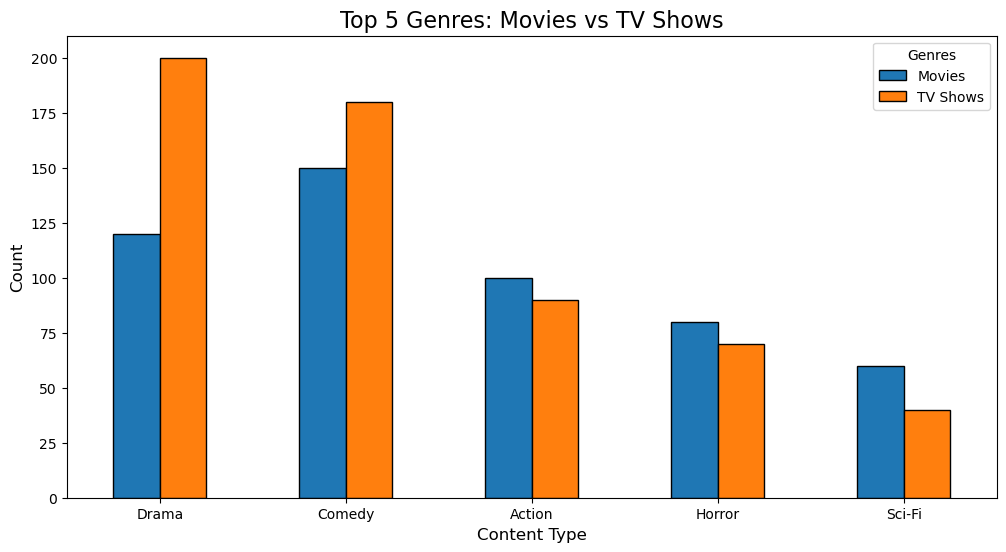

In [24]:
# Ensure genre_df has a 'Genre' and 'Count' column, and content_type_genre is structured properly
# Example data structure for content_type_genre
content_type_genre = pd.DataFrame({
    'Genre': ['Drama', 'Comedy', 'Action', 'Horror', 'Sci-Fi', 'Documentary'],
    'Movies': [120, 150, 100, 80, 60, 50],
    'TV Shows': [200, 180, 90, 70, 40, 30]
})

# Set Genre as the index to match the structure
content_type_genre.set_index('Genre', inplace=True)

# Top 5 genres for Movies and TV Shows
top_5_genres = genre_df['Genre'][:5]  # Assuming genre_df has a 'Genre' column
content_type_genre_top_5 = content_type_genre.loc[top_5_genres]  # Use loc to access rows by index

# Plot the data
content_type_genre_top_5.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Top 5 Genres: Movies vs TV Shows', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Genres')
plt.xticks(rotation=0)
plt.show()


In [25]:
print("genre_df:\n", genre_df.head())
print("content_type_genre:\n", content_type_genre.head())


genre_df:
     Genre  Count  Cumulative_Percentage
0   Drama    150                   37.5
1  Comedy    100                   62.5
2  Action     80                   82.5
3  Horror     50                   95.0
4  Sci-Fi     20                  100.0
content_type_genre:
         Movies  TV Shows
Genre                   
Drama      120       200
Comedy     150       180
Action     100        90
Horror      80        70
Sci-Fi      60        40


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Step 1: Prepare the data for clustering
# One-hot encode 'genres'
genres_encoded = netflix_data['listed_in'].str.get_dummies(sep=', ')

# Encode 'type', 'rating', and normalize numerical features
type_encoded = pd.get_dummies(netflix_data['type'], prefix='type')
rating_encoded = pd.get_dummies(netflix_data['rating'], prefix='rating')
numerical_features = netflix_data[['release_year']]

# Normalize numerical features
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)

In [27]:
# Combine all features
clustering_data = pd.concat(
    [pd.DataFrame(numerical_scaled, columns=['release_year']),
     genres_encoded, type_encoded, rating_encoded],
    axis=1)
clustering_data

release_year  Action & Adventure  Anime Features  Anime Series  \
0         0.878752                 0.0             0.0           0.0   
1         1.080715                 0.0             0.0           0.0   
2         1.080715                 0.0             0.0           0.0   
3         1.080715                 0.0             0.0           0.0   
4         1.080715                 0.0             0.0           0.0   
...            ...                 ...             ...           ...   
8802           NaN                 0.0             0.0           0.0   
8803           NaN                 0.0             0.0           0.0   
8804           NaN                 0.0             0.0           0.0   
8805           NaN                 0.0             0.0           0.0   
8806           NaN                 0.0             0.0           0.0   

      British TV Shows  Children & Family Movies  Classic & Cult TV  \
0                  0.0                       0.0                0.0   
1                  0.0                       0.0                0.0   
2                  0.0                       0.0                0.0   
3                  0.0                       0.0                0.0   
4                  0.0                       0.0                0.0   
...                ...                       ...                ...   
8802               0.0                       0.0                0.0   
8803               0.0                       0.0                0.0   
8804               0.0                       0.0                0.0   
8805               0.0                       1.0                0.0   
8806               0.0                       0.0                0.0   

      Classic Movies  Comedies  Crime TV Shows  ...  rating_PG  rating_PG-13  \
0                0.0       0.0             0.0  ...      False          True   
1                0.0       0.0             0.0  ...      False         False   
2                0.0       0.0             1.0  ...      False         False   
3                0.0       0.0             0.0  ...      False         False   
4                0.0       0.0             0.0  ...      False         False   
...              ...       ...             ...  ...        ...           ...   
8802             0.0       0.0             0.0  ...      False         False   
8803             0.0       0.0             0.0  ...      False         False   
8804             0.0       1.0             0.0  ...      False         False   
8805             0.0       1.0             0.0  ...       True         False   
8806             0.0       0.0             0.0  ...      False         False   

      rating_R  rating_TV-14  rating_TV-G  rating_TV-MA  rating_TV-PG  \
0        False         False        False         False         False   
1        False         False        False          True         False   
2        False         False        False          True         False   
3        False         False        False          True         False   
4        False         False        False          True         False   
...        ...           ...          ...           ...           ...   
8802      True         False        False         False         False   
8803     False         False        False         False         False   
8804      True         False        False         False         False   
8805     False         False        False         False         False   
8806     False          True        False         False         False   

      rating_TV-Y  rating_TV-Y7  rating_Unrated  
0           False         False           False  
1           False         False           False  
2           False         False           False  
3           False         False           False  
4           False         False           False  
...           ...           ...             ...  
8802        False         False           False  
8803        False          True           False  


In [28]:
# Align clustering_data with netflix_data by their indices
clustering_data = clustering_data.loc[netflix_data.index]
clustering_data

release_year  Action & Adventure  Anime Features  Anime Series  \
0         0.878752                 0.0             0.0           0.0   
1         1.080715                 0.0             0.0           0.0   
2         1.080715                 0.0             0.0           0.0   
3         1.080715                 0.0             0.0           0.0   
4         1.080715                 0.0             0.0           0.0   
...            ...                 ...             ...           ...   
8802           NaN                 0.0             0.0           0.0   
8803           NaN                 0.0             0.0           0.0   
8804           NaN                 0.0             0.0           0.0   
8805           NaN                 0.0             0.0           0.0   
8806           NaN                 0.0             0.0           0.0   

      British TV Shows  Children & Family Movies  Classic & Cult TV  \
0                  0.0                       0.0                0.0   
1                  0.0                       0.0                0.0   
2                  0.0                       0.0                0.0   
3                  0.0                       0.0                0.0   
4                  0.0                       0.0                0.0   
...                ...                       ...                ...   
8802               0.0                       0.0                0.0   
8803               0.0                       0.0                0.0   
8804               0.0                       0.0                0.0   
8805               0.0                       1.0                0.0   
8806               0.0                       0.0                0.0   

      Classic Movies  Comedies  Crime TV Shows  ...  rating_PG  rating_PG-13  \
0                0.0       0.0             0.0  ...      False          True   
1                0.0       0.0             0.0  ...      False         False   
2                0.0       0.0             1.0  ...      False         False   
3                0.0       0.0             0.0  ...      False         False   
4                0.0       0.0             0.0  ...      False         False   
...              ...       ...             ...  ...        ...           ...   
8802             0.0       0.0             0.0  ...      False         False   
8803             0.0       0.0             0.0  ...      False         False   
8804             0.0       1.0             0.0  ...      False         False   
8805             0.0       1.0             0.0  ...       True         False   
8806             0.0       0.0             0.0  ...      False         False   

      rating_R  rating_TV-14  rating_TV-G  rating_TV-MA  rating_TV-PG  \
0        False         False        False         False         False   
1        False         False        False          True         False   
2        False         False        False          True         False   
3        False         False        False          True         False   
4        False         False        False          True         False   
...        ...           ...          ...           ...           ...   
8802      True         False        False         False         False   
8803     False         False        False         False         False   
8804      True         False        False         False         False   
8805     False         False        False         False         False   
8806     False          True        False         False         False   

      rating_TV-Y  rating_TV-Y7  rating_Unrated  
0           False         False           False  
1           False         False           False  
2           False         False           False  
3           False         False           False  
4           False         False           False  
...           ...           ...             ...  
8802        False         False           False  
8803        False          True           False  


In [29]:
# Ensure both DataFrames have the same number of rows and aligned indices
print(f"Rows in netflix_data: {len(netflix_data)}")
print(f"Rows in clustering_data: {len(clustering_data)}")

Rows in netflix_data: 8668
Rows in clustering_data: 8668


In [30]:
clustering_data = clustering_data.loc[netflix_data.index]

In [31]:
from sklearn.cluster import KMeans
import pandas as pd

# Ensure netflix_data is a clean copy
netflix_data = netflix_data.copy()

# Check for missing values in clustering_data
print("Missing values before preprocessing:\n", clustering_data.isnull().sum())

# Handle missing values by imputing or dropping them
# Option 1: Impute missing values with column mean (or other strategies)
clustering_data = clustering_data.fillna(clustering_data.mean())

# Option 2: Drop rows with missing values (if reasonable for your analysis)
# clustering_data = clustering_data.dropna()

# Check again to confirm there are no missing values
print("Missing values after preprocessing:\n", clustering_data.isnull().sum())

# Apply K-Means clustering and assign clusters
kmeans = KMeans(n_clusters=3, random_state=42)
netflix_data['cluster'] = kmeans.fit_predict(clustering_data)

# Verify clusters
print("Cluster assignment:\n", netflix_data['cluster'].value_counts())


Missing values before preprocessing:
 release_year                    133
Action & Adventure                0
Anime Features                    0
Anime Series                      0
British TV Shows                  0
Children & Family Movies          0
Classic & Cult TV                 0
Classic Movies                    0
Comedies                          0
Crime TV Shows                    0
Cult Movies                       0
Documentaries                     0
Docuseries                        0
Dramas                            0
Faith & Spirituality              0
Horror Movies                     0
Independent Movies                0
International Movies              0
International TV Shows            0
Kids' TV                          0
Korean TV Shows                   0
LGBTQ Movies                      0
Movies                            0
Music & Musicals                  0
Reality TV                        0
Romantic Movies                   0
Romantic TV Shows         

/var/folders/k6/ynwptznn2c1_t514ts20ml540000gn/T/ipykernel_91405/4040222213.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clustering_data = clustering_data.fillna(clustering_data.mean())


Cluster assignment:
 cluster
0    5026
1    2408
2    1234
Name: count, dtype: int64


In [32]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(clustering_data, netflix_data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.20616849990383468


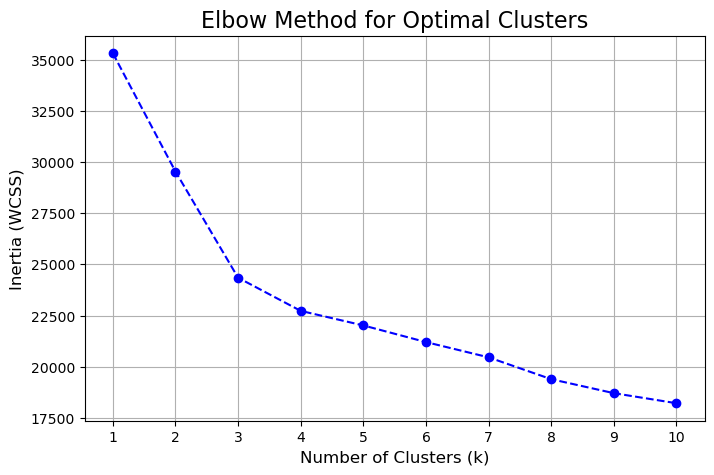

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test different numbers of clusters
inertia = []  # List to store inertia values
range_n_clusters = range(1, 11)  # Try from 1 to 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)  # Store the inertia (within-cluster sum of squares)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [34]:
# Analyze the distribution of genres within each cluster
genre_distribution = netflix_data.groupby('cluster')['listed_in'].apply(lambda x: ', '.join(x)).str.split(', ').explode().value_counts()
print(genre_distribution)

listed_in
International Movies            2710
Dramas                          2374
Comedies                        1648
International TV Shows          1347
Documentaries                    852
Action & Adventure               829
TV Dramas                        762
Independent Movies               748
Children & Family Movies         635
Romantic Movies                  608
Thrillers                        575
TV Comedies                      570
Crime TV Shows                   469
Kids' TV                         447
Docuseries                       394
Romantic TV Shows                370
Music & Musicals                 366
Horror Movies                    352
Stand-Up Comedy                  342
Reality TV                       255
British TV Shows                 250
Sci-Fi & Fantasy                 242
Sports Movies                    217
Anime Series                     174
Spanish-Language TV Shows        172
TV Action & Adventure            167
Korean TV Shows             

In [35]:
# Silhouette score for k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(clustering_data)
silhouette_3 = silhouette_score(clustering_data, labels_3)
print(f'Silhouette Score for k=3: {silhouette_3}')

# Silhouette score for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(clustering_data)
silhouette_4 = silhouette_score(clustering_data, labels_4)
print(f'Silhouette Score for k=4: {silhouette_4}')

Silhouette Score for k=3: 0.20616849990383468
Silhouette Score for k=4: 0.14653789768430617


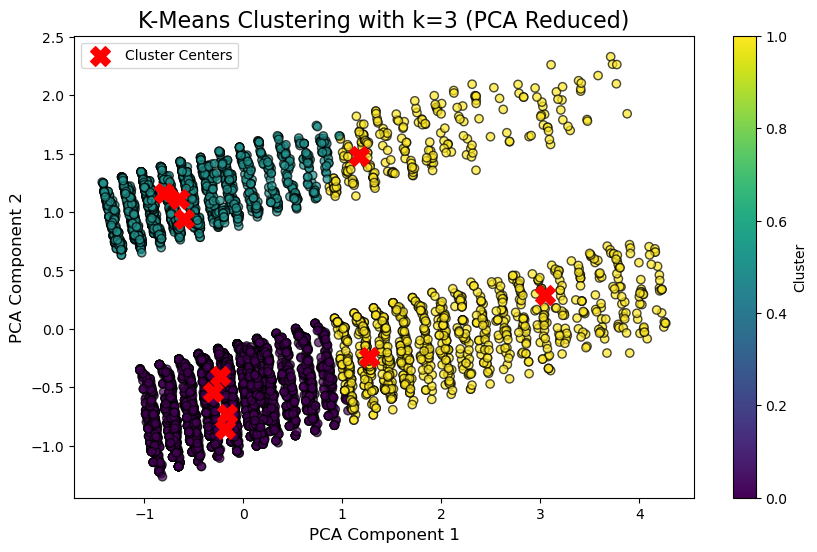

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Ensure clustering_data and kmeans are defined and clustering_data is PCA-compatible
# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(clustering_data)

# Add PCA components to the original dataset for visualization
netflix_data['pca1'] = pca_data[:, 0]
netflix_data['pca2'] = pca_data[:, 1]

# Convert cluster centers to a DataFrame with feature names
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_data.columns)

# Transform cluster centers using PCA
centers_pca = pca.transform(cluster_centers_df)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    netflix_data['pca1'], netflix_data['pca2'], 
    c=netflix_data['cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1], 
    c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering with k=3 (PCA Reduced)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


In [37]:
cluster_summary = netflix_data.groupby('cluster')[['type', 'rating']].agg(lambda x: x.value_counts().index[0])
print(cluster_summary)

            type rating
cluster                
0          Movie  TV-MA
1        TV Show  TV-MA
2          Movie  TV-MA


In [38]:
genre_distribution = netflix_data.groupby('cluster')['listed_in'].apply(lambda x: ', '.join(x)).str.split(', ').explode().value_counts()
print(genre_distribution)

listed_in
International Movies            2710
Dramas                          2374
Comedies                        1648
International TV Shows          1347
Documentaries                    852
Action & Adventure               829
TV Dramas                        762
Independent Movies               748
Children & Family Movies         635
Romantic Movies                  608
Thrillers                        575
TV Comedies                      570
Crime TV Shows                   469
Kids' TV                         447
Docuseries                       394
Romantic TV Shows                370
Music & Musicals                 366
Horror Movies                    352
Stand-Up Comedy                  342
Reality TV                       255
British TV Shows                 250
Sci-Fi & Fantasy                 242
Sports Movies                    217
Anime Series                     174
Spanish-Language TV Shows        172
TV Action & Adventure            167
Korean TV Shows             

In [39]:
cluster_summary = netflix_data.groupby('cluster').agg({
    'type': lambda x: x.value_counts().idxmax(),  # Most common type (Movie/TV Show)
    'rating': lambda x: x.value_counts().idxmax(),  # Most common rating
    'release_year': 'median',  # Median release year
})
print(cluster_summary)

            type rating  release_year
cluster                              
0          Movie  TV-MA        2017.0
1        TV Show  TV-MA        2018.0
2          Movie  TV-MA        2016.0


In [40]:
cluster_genre_dist = netflix_data.groupby('cluster')['listed_in'].apply(
    lambda x: ', '.join(x)
).str.split(', ').explode().value_counts(normalize=True).reset_index()
cluster_genre_dist.columns = ['Genre', 'Proportion']
print(cluster_genre_dist)

                           Genre  Proportion
0           International Movies    0.142752
1                         Dramas    0.125053
2                       Comedies    0.086810
3         International TV Shows    0.070954
4                  Documentaries    0.044880
5             Action & Adventure    0.043668
6                      TV Dramas    0.040139
7             Independent Movies    0.039402
8       Children & Family Movies    0.033449
9                Romantic Movies    0.032027
10                     Thrillers    0.030289
11                   TV Comedies    0.030025
12                Crime TV Shows    0.024705
13                      Kids' TV    0.023546
14                    Docuseries    0.020754
15             Romantic TV Shows    0.019490
16              Music & Musicals    0.019279
17                 Horror Movies    0.018542
18               Stand-Up Comedy    0.018015
19                    Reality TV    0.013432
20              British TV Shows    0.013169
21        

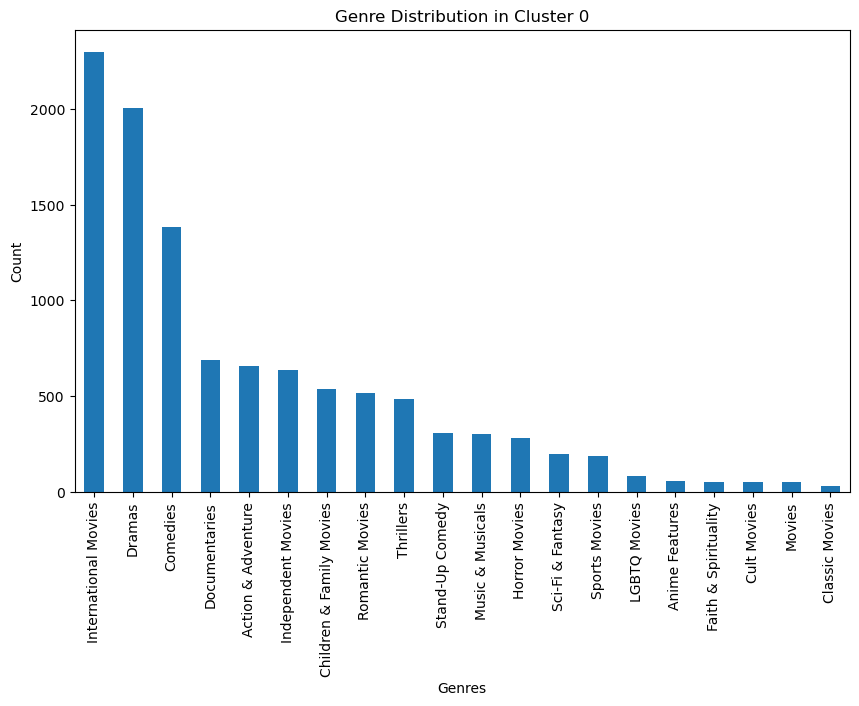

listed_in
International Movies        2297
Dramas                      2004
Comedies                    1384
Documentaries                690
Action & Adventure           656
Independent Movies           637
Children & Family Movies     539
Romantic Movies              516
Thrillers                    486
Stand-Up Comedy              307
Name: count, dtype: int64


In [41]:
# Bar plot for genres in Cluster 0
cluster_0_genres = netflix_data[netflix_data['cluster'] == 0]['listed_in'].str.split(', ').explode().value_counts()
cluster_0_genres.plot(kind='bar', figsize=(10, 6), title="Genre Distribution in Cluster 0")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.show()

cluster_0_genres = netflix_data[netflix_data['cluster'] == 0]['listed_in'].str.split(', ').explode().value_counts()
print(cluster_0_genres.head(10))

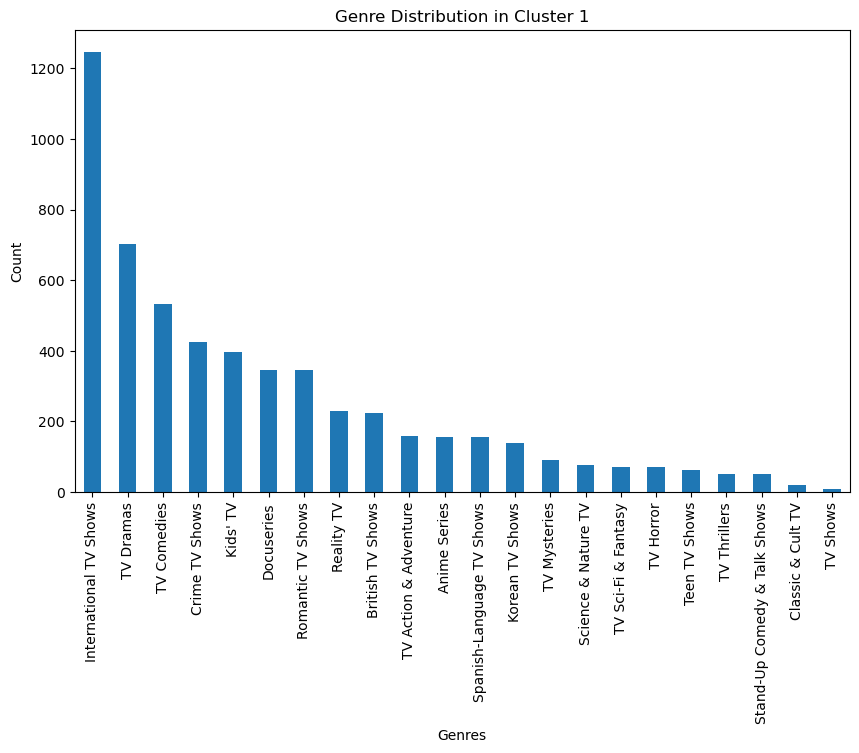

listed_in
International TV Shows    1246
TV Dramas                  703
TV Comedies                532
Crime TV Shows             425
Kids' TV                   397
Docuseries                 347
Romantic TV Shows          345
Reality TV                 229
British TV Shows           225
TV Action & Adventure      158
Name: count, dtype: int64


In [42]:
# Analyze genres in Cluster 1
cluster_1_genres = netflix_data[netflix_data['cluster'] == 1]['listed_in'].str.split(', ').explode().value_counts()

# Plot genre distribution for Cluster 1
cluster_1_genres.plot(kind='bar', figsize=(10, 6), title="Genre Distribution in Cluster 1")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.show()

cluster_0_genres = netflix_data[netflix_data['cluster'] == 1]['listed_in'].str.split(', ').explode().value_counts()
print(cluster_0_genres.head(10))

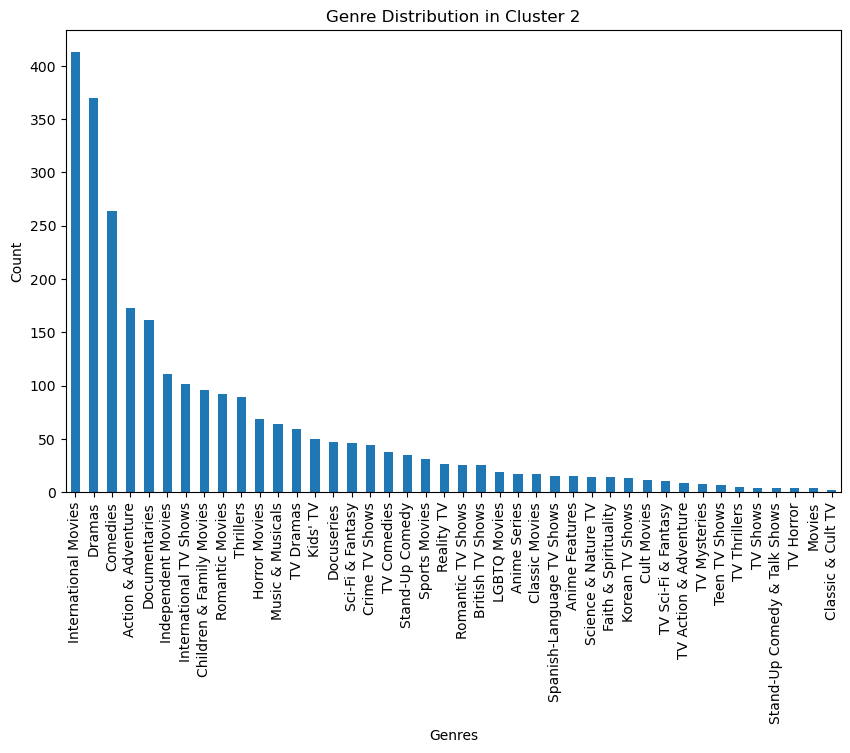

listed_in
International Movies        413
Dramas                      370
Comedies                    264
Action & Adventure          173
Documentaries               162
Independent Movies          111
International TV Shows      101
Children & Family Movies     96
Romantic Movies              92
Thrillers                    89
Name: count, dtype: int64


In [43]:
# Analyze genres in Cluster 2
cluster_2_genres = netflix_data[netflix_data['cluster'] == 2]['listed_in'].str.split(', ').explode().value_counts()

# Plot genre distribution for Cluster 2
cluster_2_genres.plot(kind='bar', figsize=(10, 6), title="Genre Distribution in Cluster 2")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.show()

cluster_0_genres = netflix_data[netflix_data['cluster'] == 2]['listed_in'].str.split(', ').explode().value_counts()
print(cluster_0_genres.head(10))

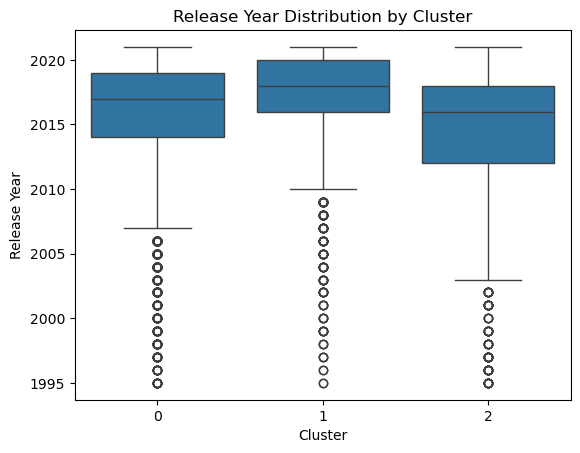

In [44]:
# Distribution of release years by cluster
sns.boxplot(x='cluster', y='release_year', data=netflix_data)
plt.title("Release Year Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Release Year")
plt.show()

In [45]:
rating_dist = netflix_data.groupby('cluster')['rating'].value_counts(normalize=True).unstack()
print(rating_dist)

rating         NR        PG     PG-13         R     TV-14      TV-G     TV-MA  \
cluster                                                                         
0        0.011739  0.043772  0.076005  0.121369  0.233585  0.021886  0.355153   
1        0.001661       NaN       NaN       NaN  0.274917  0.035299  0.438123   
2        0.011345  0.043760  0.084279  0.141005  0.231767  0.017828  0.282820   

rating      TV-PG      TV-Y     TV-Y7   Unrated  
cluster                                          
0        0.082969  0.023279  0.022682  0.007561  
1        0.115449  0.061877  0.072259  0.000415  
2        0.115073  0.032415  0.036467  0.003241  


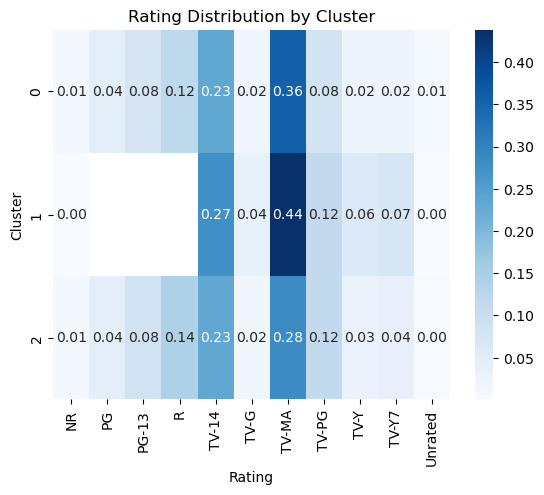

In [46]:
sns.heatmap(rating_dist, annot=True, cmap='Blues', fmt=".2f")
plt.title("Rating Distribution by Cluster")
plt.ylabel("Cluster")
plt.xlabel("Rating")
plt.show()

In [47]:
# Analyze Genre Diversity:

In [48]:
netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

# Flatten the list of genres to count the occurrences of each genre
all_genres = [genre for sublist in netflix_data['listed_in'] for genre in sublist]
genre_counts = Counter(all_genres)

# Display the genre counts
print("Genre counts:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Genre counts:
Documentaries: 852
International TV Shows: 1347
TV Dramas: 762
TV Mysteries: 98
Crime TV Shows: 469
TV Action & Adventure: 167
Docuseries: 394
Reality TV: 255
Romantic TV Shows: 370
TV Comedies: 570
TV Horror: 75
Children & Family Movies: 635
Dramas: 2374
Independent Movies: 748
International Movies: 2710
British TV Shows: 250
Comedies: 1648
Spanish-Language TV Shows: 172
Thrillers: 575
Romantic Movies: 608
Music & Musicals: 366
Horror Movies: 352
Sci-Fi & Fantasy: 242
TV Thrillers: 57
Kids' TV: 447
Action & Adventure: 829
TV Sci-Fi & Fantasy: 82
Anime Features: 70
Sports Movies: 217
Anime Series: 174
Korean TV Shows: 151
Science & Nature TV: 92
Teen TV Shows: 69
Classic Movies: 45
Cult Movies: 60
TV Shows: 13
Faith & Spirituality: 65
LGBTQ Movies: 102
Stand-Up Comedy: 342
Movies: 53
Stand-Up Comedy & Talk Shows: 56
Classic & Cult TV: 21


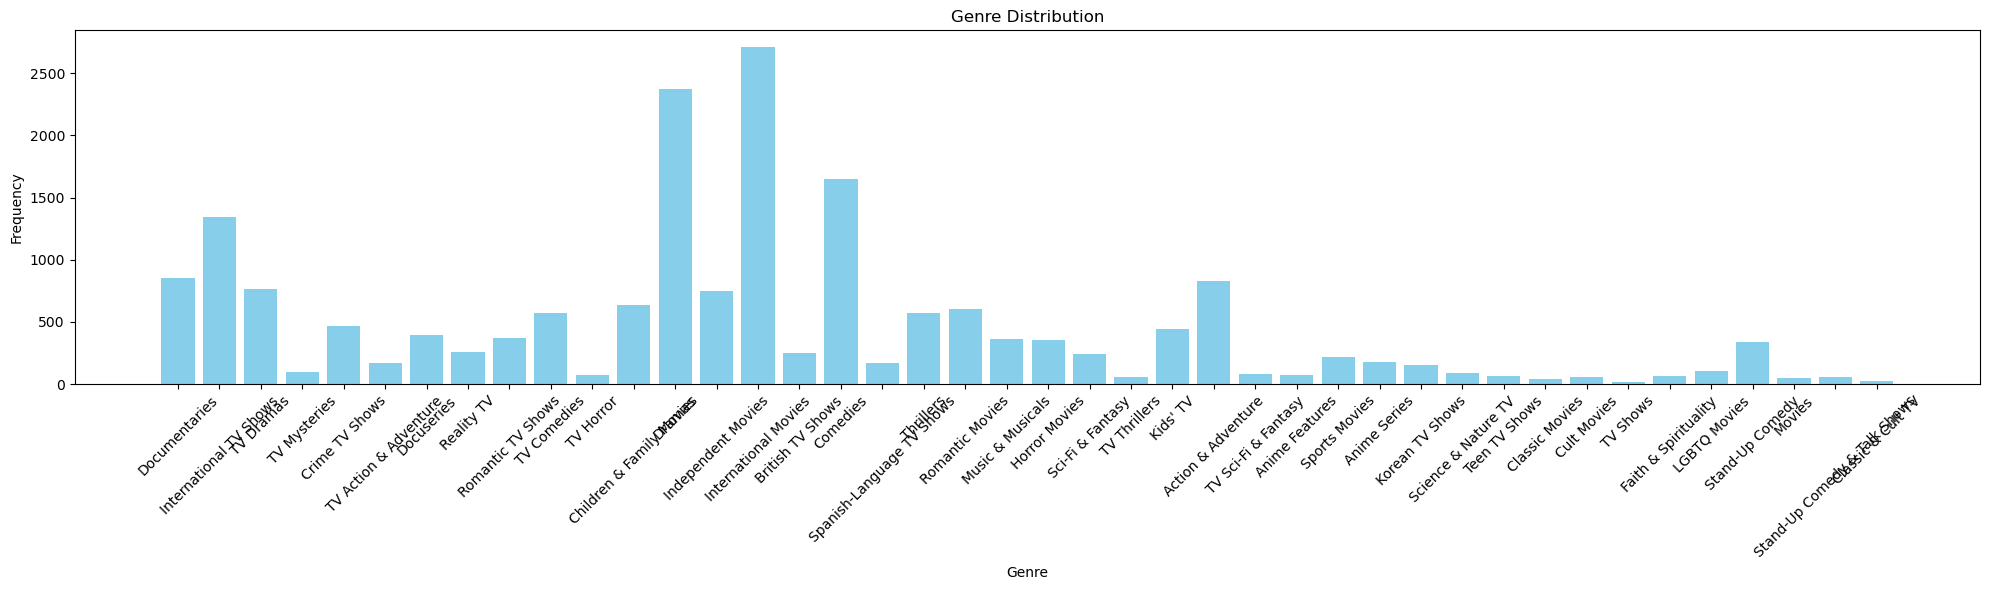

In [49]:
# Plot the genre distribution
plt.figure(figsize=(20, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Identifying content gaps
# Set a threshold to consider genres with less content as gaps

threshold = 2
gaps = {genre: count for genre, count in genre_counts.items() if count <= threshold}

# Display the content gaps
print("\nContent gaps (genres with fewer than {} items):".format(threshold))
for genre, count in gaps.items():
    print(f"{genre}: {count} items")


# Suggesting more content in less represented genres
if gaps:
    print("\nSuggestions for content expansion:")
    for genre in gaps.keys():
        print(f"- Add more content in the '{genre}' genre.")
else:
    print("\nNo significant content gaps identified.")


Content gaps (genres with fewer than 2 items):

No significant content gaps identified.


In [51]:
#yearly trend
# Group by release year and genre
# Explode the 'listed_in' column to separate genres into individual rows
netflix_data_exploded = netflix_data.explode('listed_in')

# Ensure the column used for grouping is not empty or NaN
netflix_data_exploded = netflix_data_exploded[~netflix_data_exploded['listed_in'].isnull()]

# Group by release year and genre to calculate counts
year_genre = netflix_data_exploded.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

# Display the result
print(year_genre)

listed_in     Action & Adventure  Anime Features  Anime Series  \
release_year                                                     
1995                           8               0             1   
1996                           3               0             0   
1997                          11               1             0   
1998                           5               1             1   
1999                          10               0             1   
2000                           9               0             1   
2001                          11               1             1   
2002                          15               2             1   
2003                          15               2             2   
2004                          17               3             0   
2005                          12               1             1   
2006                          11               1             4   
2007                          15               1             1   
2008      

In [52]:
print(netflix_data['listed_in'].head())
print(netflix_data['listed_in'].apply(type).unique())

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: listed_in, dtype: object
[<class 'list'>]


In [53]:
# Geographical gap
# Ensure 'listed_in' is exploded into separate strings instead of lists

# Check if there are any nested lists or non-hashable types
nested_lists = netflix_data['listed_in'].apply(lambda x: isinstance(x, list))
#print(netflix_data[nested_lists]['listed_in'])

# Flatten the 'listed_in' column if necessary
def flatten_list(value):
    if isinstance(value, list):
        return ', '.join(map(str, value))  # Convert list elements to strings and join
    return value

netflix_data['listed_in'] = netflix_data['listed_in'].apply(flatten_list)

# Explode the 'listed_in' column to separate genres into individual rows
netflix_data_exploded = netflix_data.explode('listed_in')

# Remove rows where 'listed_in' is NaN or empty
netflix_data_exploded = netflix_data_exploded[~netflix_data_exploded['listed_in'].isnull()]
netflix_data_exploded = netflix_data_exploded[netflix_data_exploded['listed_in'] != '']

# Ensure the 'listed_in' column is a string type
netflix_data_exploded['listed_in'] = netflix_data_exploded['listed_in'].astype(str)

# Remove any duplicate rows that may have been created during the explosion
#netflix_data_exploded = netflix_data_exploded.drop_duplicates()

# Group by country and genre to get counts
country_genre = netflix_data_exploded.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

# Print countries with low representation in specific genres (e.g., < 10)
low_representation = country_genre.loc[:, country_genre.sum(axis=0) < 10]

# Check if the DataFrame is not empty before printing
if not low_representation.empty:
    print(low_representation)
else:
    print("No genres found with less than 10 total occurrences.")


listed_in                                           Action & Adventure, Anime Features  \
country                                                                                  
, France, Algeria                                                                    0   
, South Korea                                                                        0   
Argentina                                                                            0   
Argentina, Brazil, France, Poland, Germany, Den...                                   0   
Argentina, Chile                                                                     0   
...                                                                                ...   
Uruguay, Spain, Mexico                                                               0   
Venezuela                                                                            0   
Venezuela, Colombia                                                                  0   
Vietnam   

In [54]:
#models for churn prediction and popularity analysis.

#CHURN PREDICTION

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [55]:
# Extracting numerical features from 'duration' (converting duration to minutes)
def extract_duration(value):
    if isinstance(value, str):
        if 'Season' in value:  # Handle TV Shows, assuming 1 season = 60 minutes
            return int(value.split()[0]) * 60
        elif 'min' in value:  # Handle Movies (duration in minutes)
            return int(value.split()[0])
    return 0
    
# Apply the duration extraction function to the 'duration' column
netflix_data['duration'] = netflix_data['duration'].apply(lambda x: extract_duration(x) if isinstance(x, str) else 0)


In [56]:
# Encoding categorical variables into numerical format
le_type = LabelEncoder()
netflix_data['type_encoded'] = le_type.fit_transform(netflix_data['type'])

le_rating = LabelEncoder()
netflix_data['rating_encoded'] = le_rating.fit_transform(netflix_data['rating'])


In [57]:
# Feature Engineering for Popularity (Using release year and date added)
netflix_data['release_recent'] = 2024 - netflix_data['release_year']  # Years since release
netflix_data['added_recent'] = pd.to_datetime(netflix_data['date_added'], errors='coerce').dt.year.fillna(2020).astype(int)
netflix_data['added_recent'] = 2024 - netflix_data['added_recent']  # Years since added to Netflix


In [58]:
#CHURN PREDICTION

# Create target for churn prediction (1 if movie, 0 if TV Show)
netflix_data['churn'] = netflix_data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Split the data for Churn Prediction Model
X_churn = netflix_data[['duration', 'release_recent', 'added_recent', 'rating_encoded']]
y_churn = netflix_data['churn']
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)

# Train the Churn Prediction Model (Random Forest Classifier)
churn_model = RandomForestClassifier(random_state=42)
churn_model.fit(X_train_churn, y_train_churn)

# Evaluate Churn Prediction Model
y_pred_churn = churn_model.predict(X_test_churn)
churn_report = classification_report(y_test_churn, y_pred_churn)
print("Churn Prediction Model Evaluation")
print("Random Forest Classifier Evaluation:")
print(churn_report)


Churn Prediction Model Evaluation
Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       814
           1       1.00      0.98      0.99      1787

    accuracy                           0.98      2601
   macro avg       0.98      0.99      0.98      2601
weighted avg       0.98      0.98      0.98      2601



In [59]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_churn, y_train_churn)

y_pred_lr = lr_model.predict(X_test_churn)
print("Logistic Regression Evaluation:")
print(classification_report(y_test_churn, y_pred_lr))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.63      0.16      0.26       814
           1       0.72      0.96      0.82      1787

    accuracy                           0.71      2601
   macro avg       0.67      0.56      0.54      2601
weighted avg       0.69      0.71      0.64      2601



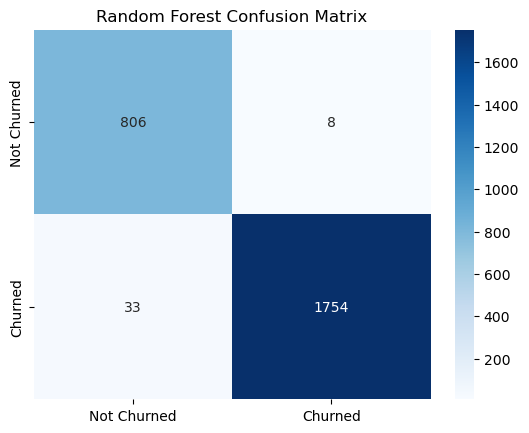

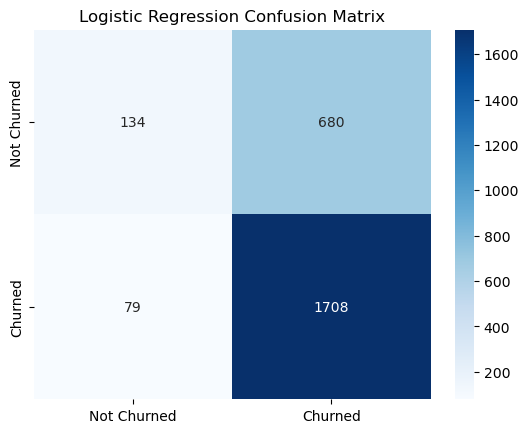

In [60]:
# Confusion matrix

cm_rf = confusion_matrix(y_test_churn, y_pred_churn)
cm_lr = confusion_matrix(y_test_churn, y_pred_lr)

# Plot confusion matrix for better understanding
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Random Forest Confusion Matrix')
plt.show()
print("\n")

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [61]:
#POPULARITY ANALYSIS

# Split the data for Popularity Analysis (using release year as a proxy for popularity)
X_popularity = netflix_data[['duration', 'release_recent', 'added_recent', 'rating_encoded']]
y_popularity = netflix_data['release_year']  # Using release year as a proxy for popularity
X_train_popularity, X_test_popularity, y_train_popularity, y_test_popularity = train_test_split(
    X_popularity, y_popularity, test_size=0.3, random_state=42
)

# Train the Popularity Analysis Model
# Random Forest Regressor Model for Popularity Prediction
rf_pop_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pop_model.fit(X_train_popularity, y_train_popularity)

# Linear Regression Model for Popularity Prediction
from sklearn.linear_model import LinearRegression
lr_pop_model = LinearRegression()
lr_pop_model.fit(X_train_popularity, y_train_popularity)

# Predictions and Evaluation
y_pred_rf_pop = rf_pop_model.predict(X_test_popularity)
y_pred_lr_pop = lr_pop_model.predict(X_test_popularity)

# Evaluate the models
print("Random Forest Regressor Evaluation (MSE):")
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test_popularity, y_pred_rf_pop))
print("\n")

print("Linear Regression Evaluation (MSE):")
print("Mean Squared Error (Linear Regression):", mean_squared_error(y_test_popularity, y_pred_lr_pop))

Random Forest Regressor Evaluation (MSE):
Mean Squared Error (Random Forest): 0.0


Linear Regression Evaluation (MSE):
Mean Squared Error (Linear Regression): 0.0


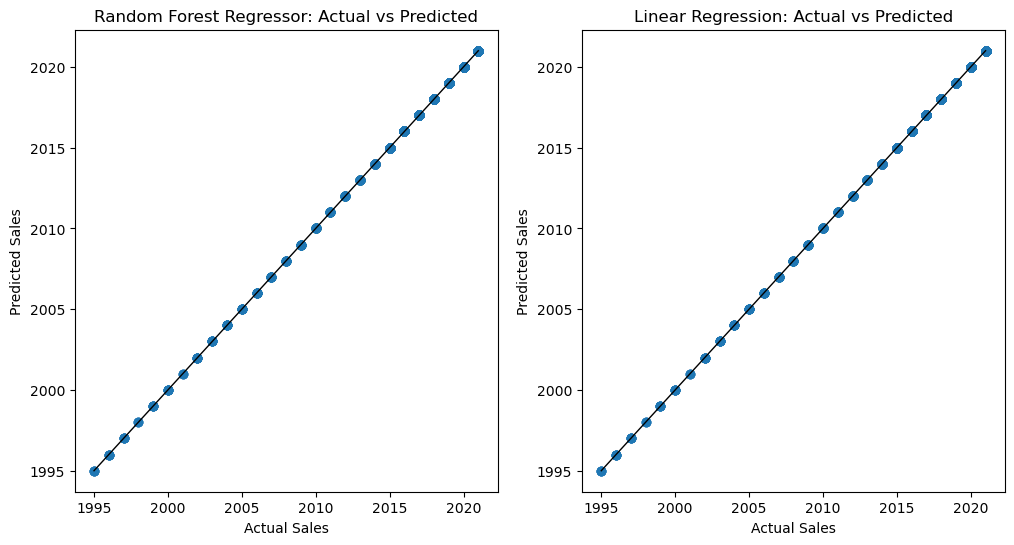

In [62]:
# Plot predictions vs actual values for both models
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test_popularity, y_pred_rf_pop, alpha=0.7)
plt.plot([y_test_popularity.min(), y_test_popularity.max()], [y_test_popularity.min(), y_test_popularity.max()],  'k', lw=1)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Regressor: Actual vs Predicted')

# Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_popularity, y_pred_lr_pop, alpha=0.7)
plt.plot([y_test_popularity.min(), y_test_popularity.max()], [y_test_popularity.min(), y_test_popularity.max()], 'k', lw=1)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted')

#plt.tight_layout()
plt.show()

In [63]:
%pip install wordcloud
%pip install textblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [64]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from textblob import TextBlob

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

netflix_data['cleaned_description'] = netflix_data['description'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikeya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karthikeya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karthikeya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


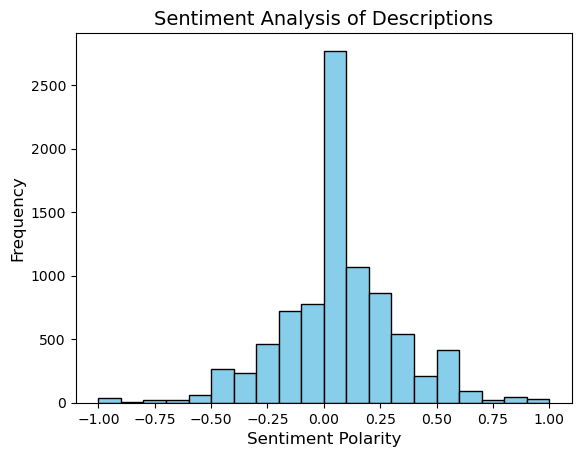

In [65]:
# Sentiment Analysis
netflix_data['sentiment'] = netflix_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.hist(netflix_data['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Analysis of Descriptions', fontsize=14)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

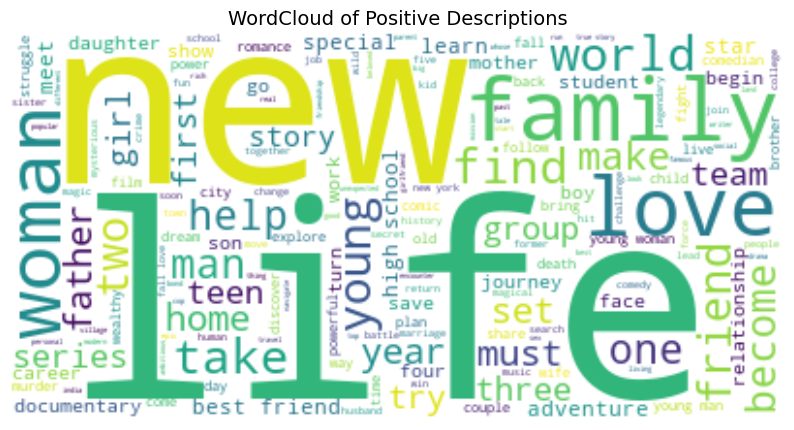

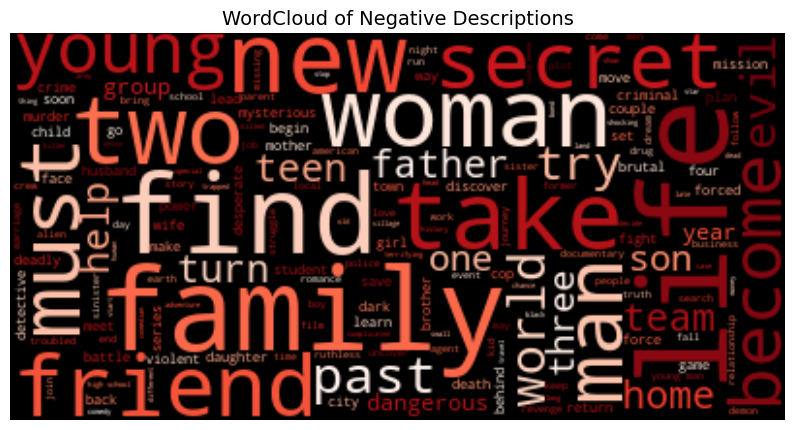

In [66]:
# Generate WordCloud for Positive Sentiments
positive_text = ' '.join(netflix_data[netflix_data['sentiment'] > 0]['cleaned_description'])
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Descriptions', fontsize=14)
plt.show()

# Generate WordCloud for Negative Sentiments
negative_text = ' '.join(netflix_data[netflix_data['sentiment'] < 0]['cleaned_description'])
negative_wordcloud = WordCloud(background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Descriptions', fontsize=14)
plt.show()


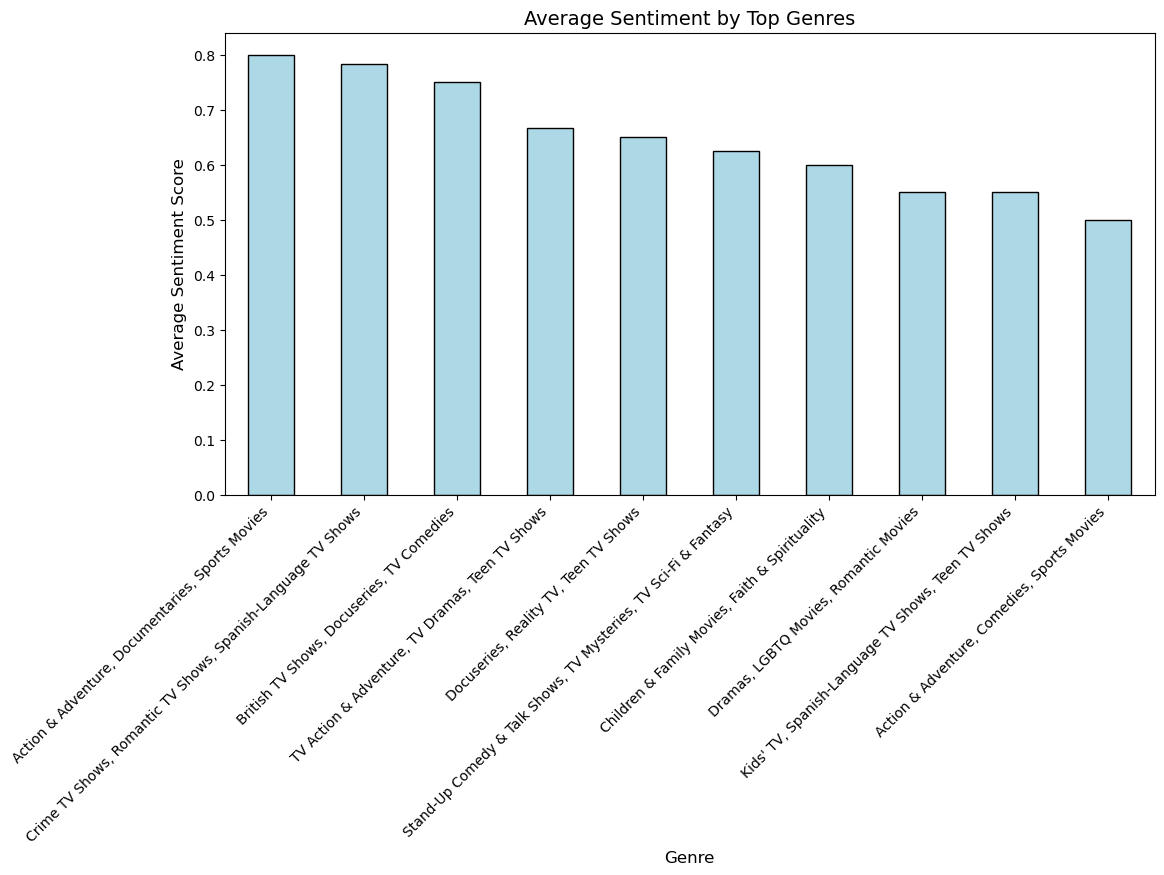

In [67]:
# Sentiment Distribution by Genre
sentiment_by_genre = netflix_data.groupby('listed_in')['sentiment'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sentiment_by_genre.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Sentiment by Top Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [68]:
# Split genres into a list for analysis
genre_specific_text = netflix_data.explode('listed_in')

# Function to get most common words in a specific genre
def common_words_in_genre(genre):
    text = ' '.join(genre_specific_text[genre_specific_text['listed_in'] == genre]['cleaned_description'])
    words = text.split()
    return Counter(words).most_common(10)

# Example: Most common words in "Drama"
drama_words = common_words_in_genre('Drama')
print("Most Common Words in Drama Descriptions:", drama_words)

# Example: Most common words in "Comedy"
comedy_words = common_words_in_genre('Comedy')
print("Most Common Words in Comedy Descriptions:", comedy_words)


Most Common Words in Drama Descriptions: []
Most Common Words in Comedy Descriptions: []


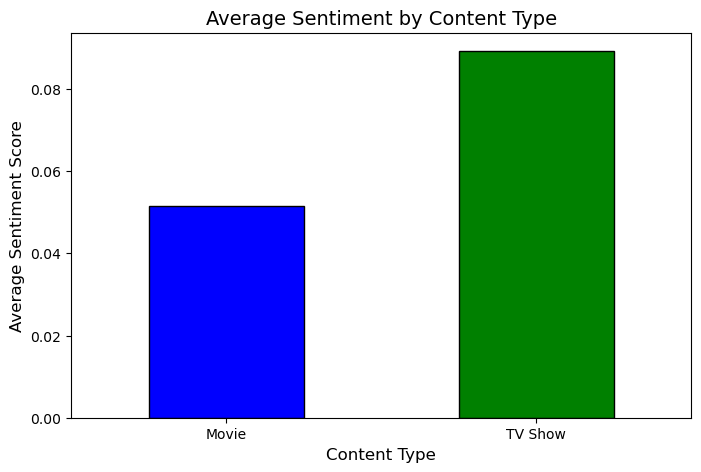

In [69]:
# Average Sentiment by Content Type (Movie vs. TV Show)
sentiment_by_type = netflix_data.groupby('type')['sentiment'].mean()

plt.figure(figsize=(8, 5))
sentiment_by_type.plot(kind='bar', color=['blue', 'green'], edgecolor='black')
plt.title('Average Sentiment by Content Type', fontsize=14)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [70]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate Bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(netflix_data['cleaned_description'])

# Top 10 Bigrams
bigram_counts = pd.DataFrame(bigrams.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
bigram_counts.columns = ['Count']
bigram_counts = bigram_counts.sort_values(by='Count', ascending=False).head(10)

print("Top 10 Bigrams:")
print(bigram_counts)

# Generate Trigrams
vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigrams = vectorizer_trigrams.fit_transform(netflix_data['cleaned_description'])

# Top 10 Trigrams
trigram_counts = pd.DataFrame(trigrams.sum(axis=0), columns=vectorizer_trigrams.get_feature_names_out()).T
trigram_counts.columns = ['Count']
trigram_counts = trigram_counts.sort_values(by='Count', ascending=False).head(10)

print("Top 10 Trigrams:")
print(trigram_counts)


Top 10 Bigrams:
                     Count
high school            142
young woman            123
young man              112
best friend            107
new york                97
fall love               65
true story              64
based true              49
los angeles             47
documentary follows     42
Top 10 Trigrams:
                     Count
new york city           41
world war ii            33
based true story        31
based true event        16
high school senior      12
life turned upside      11
inspired true event     11
high school student     11
based real event        10
dream come true          9


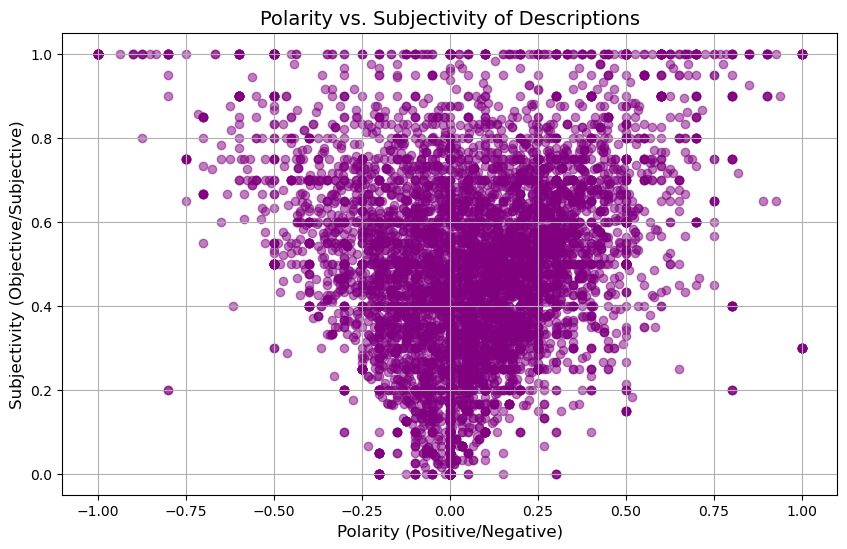

In [71]:
# Calculate Polarity and Subjectivity
netflix_data['polarity'] = netflix_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
netflix_data['subjectivity'] = netflix_data['description'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Scatterplot of Polarity vs. Subjectivity
plt.figure(figsize=(10, 6))
plt.scatter(netflix_data['polarity'], netflix_data['subjectivity'], alpha=0.5, color='purple')
plt.title('Polarity vs. Subjectivity of Descriptions', fontsize=14)
plt.xlabel('Polarity (Positive/Negative)', fontsize=12)
plt.ylabel('Subjectivity (Objective/Subjective)', fontsize=12)
plt.grid()
plt.show()


In [72]:
# Prepare time series data
time_series_data = netflix_data['date_added'].dt.to_period('M').value_counts().sort_index()
time_series = pd.Series(time_series_data.values, index=time_series_data.index.to_timestamp())


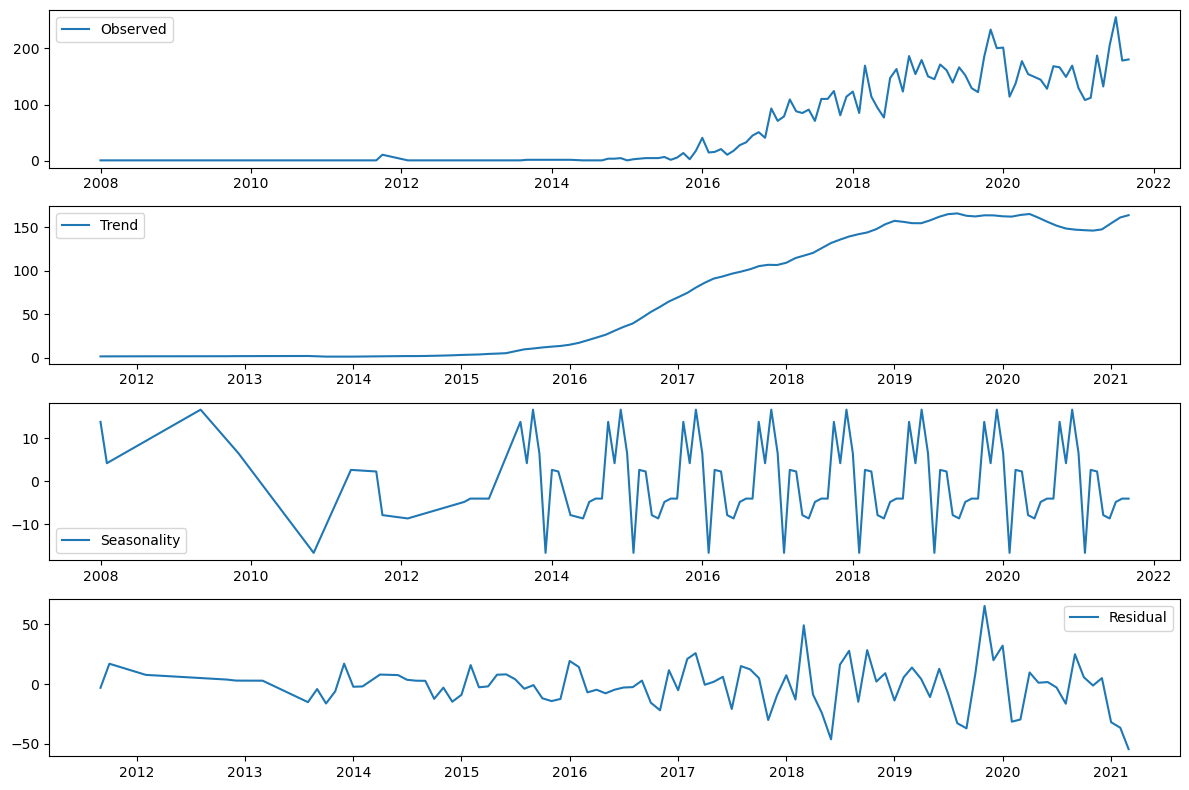

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


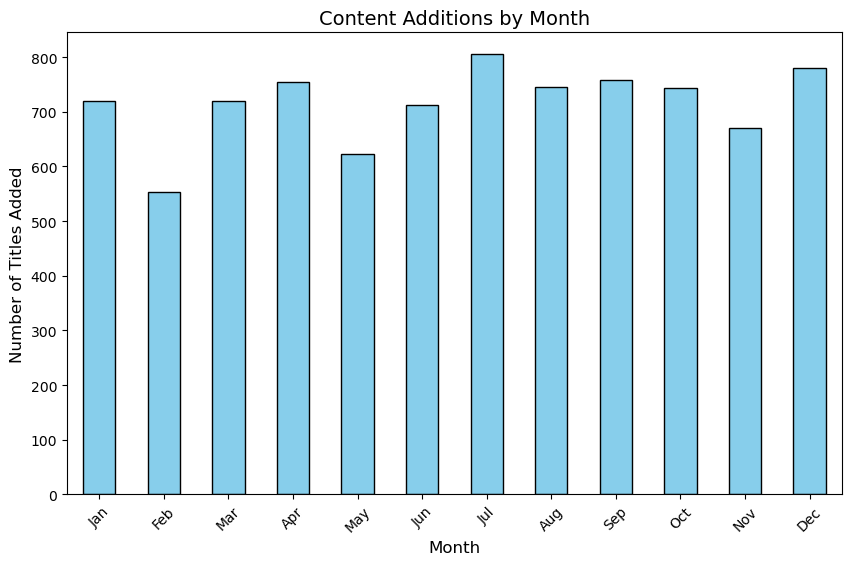

In [74]:
# Monthly pattern of content additions
monthly_additions = netflix_data['date_added'].dt.month.value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_additions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Content Additions by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


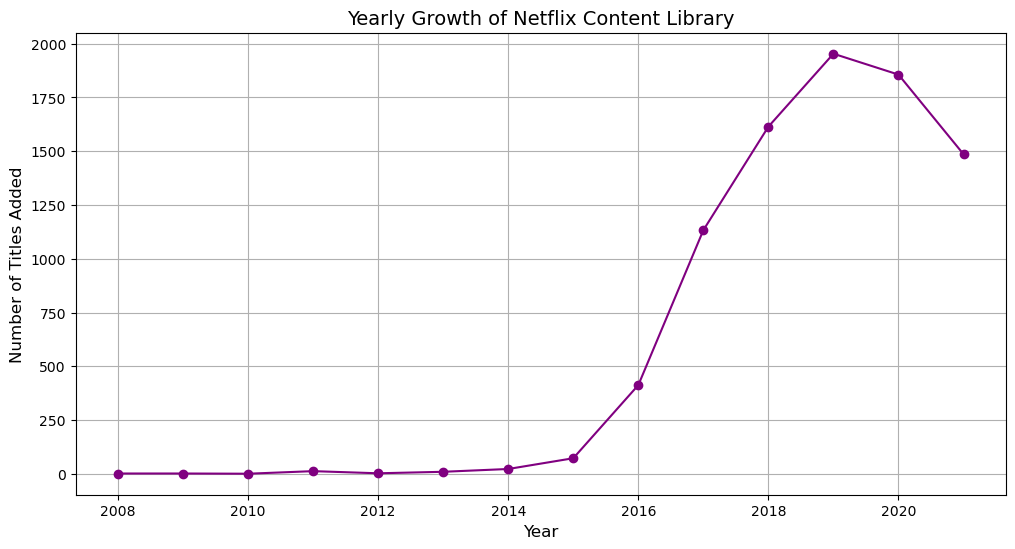

In [75]:
# Yearly growth trend
yearly_additions = netflix_data['date_added'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_additions.plot(kind='line', marker='o', color='purple')
plt.title('Yearly Growth of Netflix Content Library', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid()
plt.show()


Note: you may need to restart the kernel to use updated packages.


13:59:03 - cmdstanpy - INFO - Chain [1] start processing
13:59:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


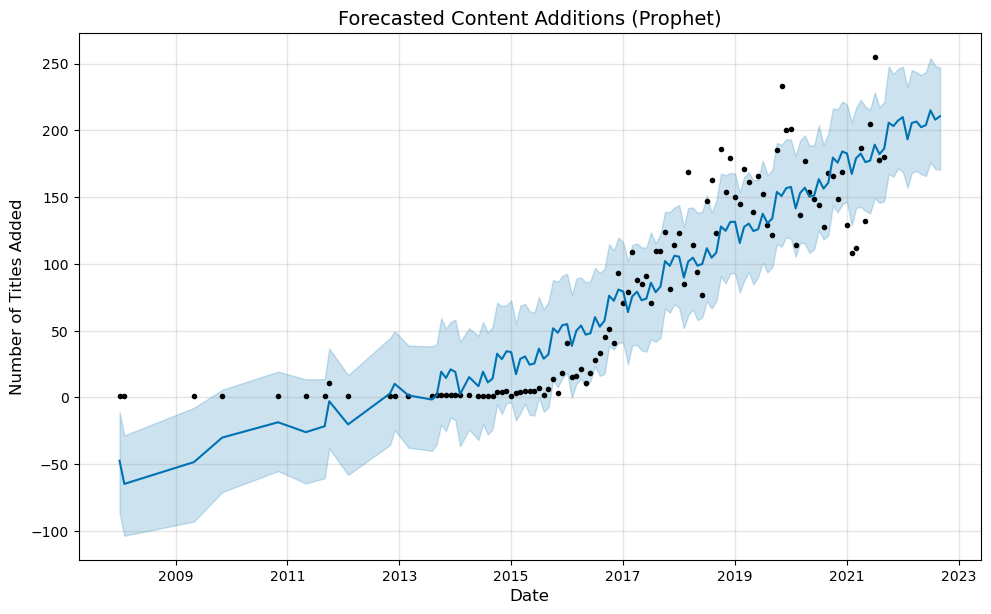

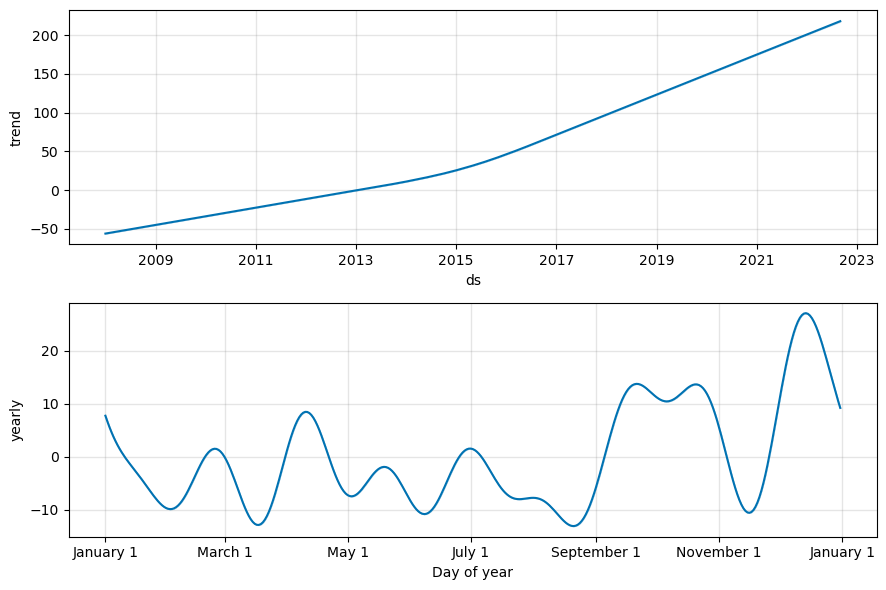

In [76]:
%pip install prophet

from prophet import Prophet

# Prepare the data for Prophet
time_series_df = time_series.reset_index()
time_series_df.columns = ['ds', 'y']  # Prophet requires these column names

# Train the Prophet model
model = Prophet()
model.fit(time_series_df)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Forecasted Content Additions (Prophet)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.show()

# Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()


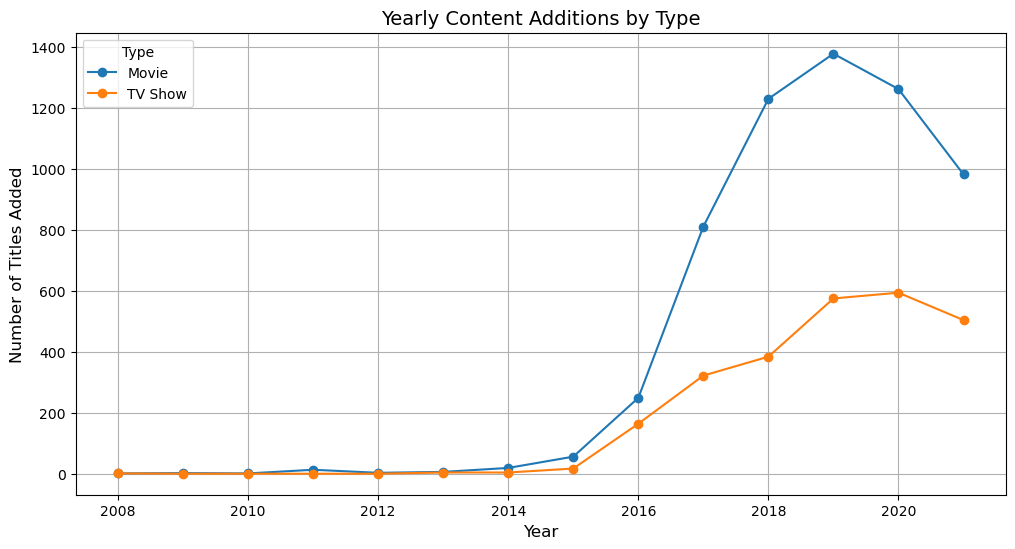

In [77]:
# Extract content types over time
type_trend = netflix_data.groupby([netflix_data['date_added'].dt.year, 'type']).size().unstack(fill_value=0)

# Plot trends for Movies and TV Shows
plt.figure(figsize=(12, 6))
type_trend.plot(ax=plt.gca(), marker='o')
plt.title('Yearly Content Additions by Type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Type')
plt.grid()
plt.show()


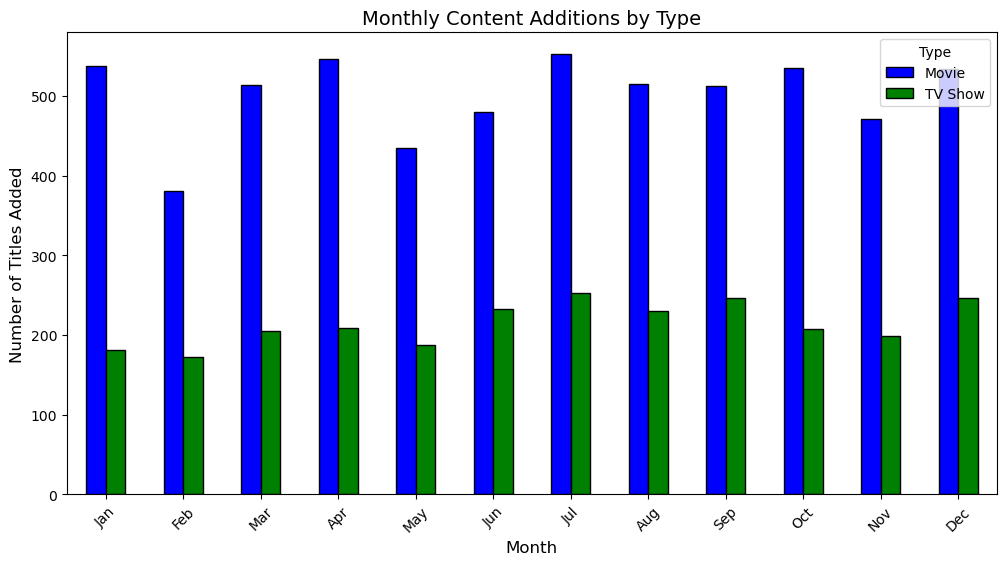

In [78]:
# Monthly additions by type
monthly_trend_by_type = netflix_data.groupby([netflix_data['date_added'].dt.month, 'type']).size().unstack()

# Plot monthly trends
monthly_trend_by_type.plot(kind='bar', figsize=(12, 6), color=['blue', 'green'], edgecolor='black')
plt.title('Monthly Content Additions by Type', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Type')
plt.show()


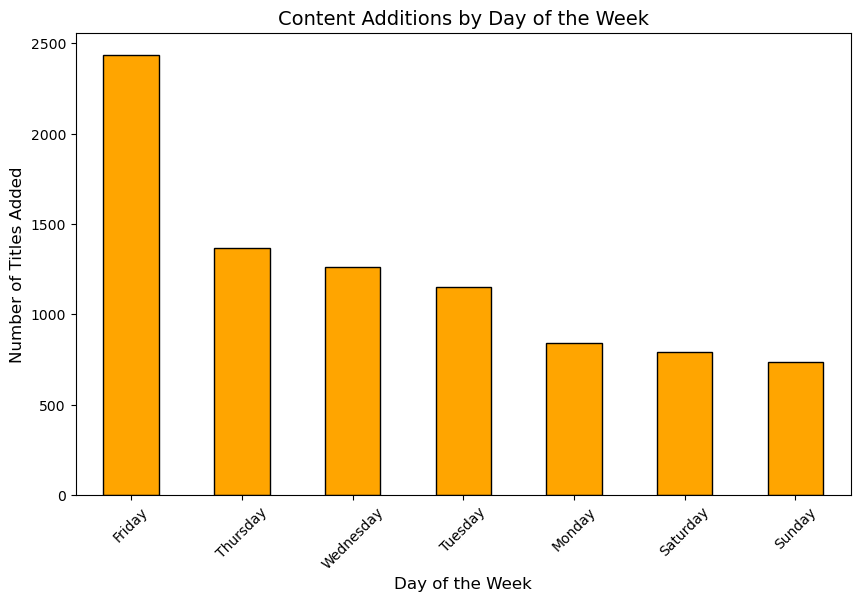

In [79]:
# Day of the week distribution
day_of_week = netflix_data['date_added'].dt.day_name().value_counts()

plt.figure(figsize=(10, 6))
day_of_week.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Content Additions by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45)
plt.show()


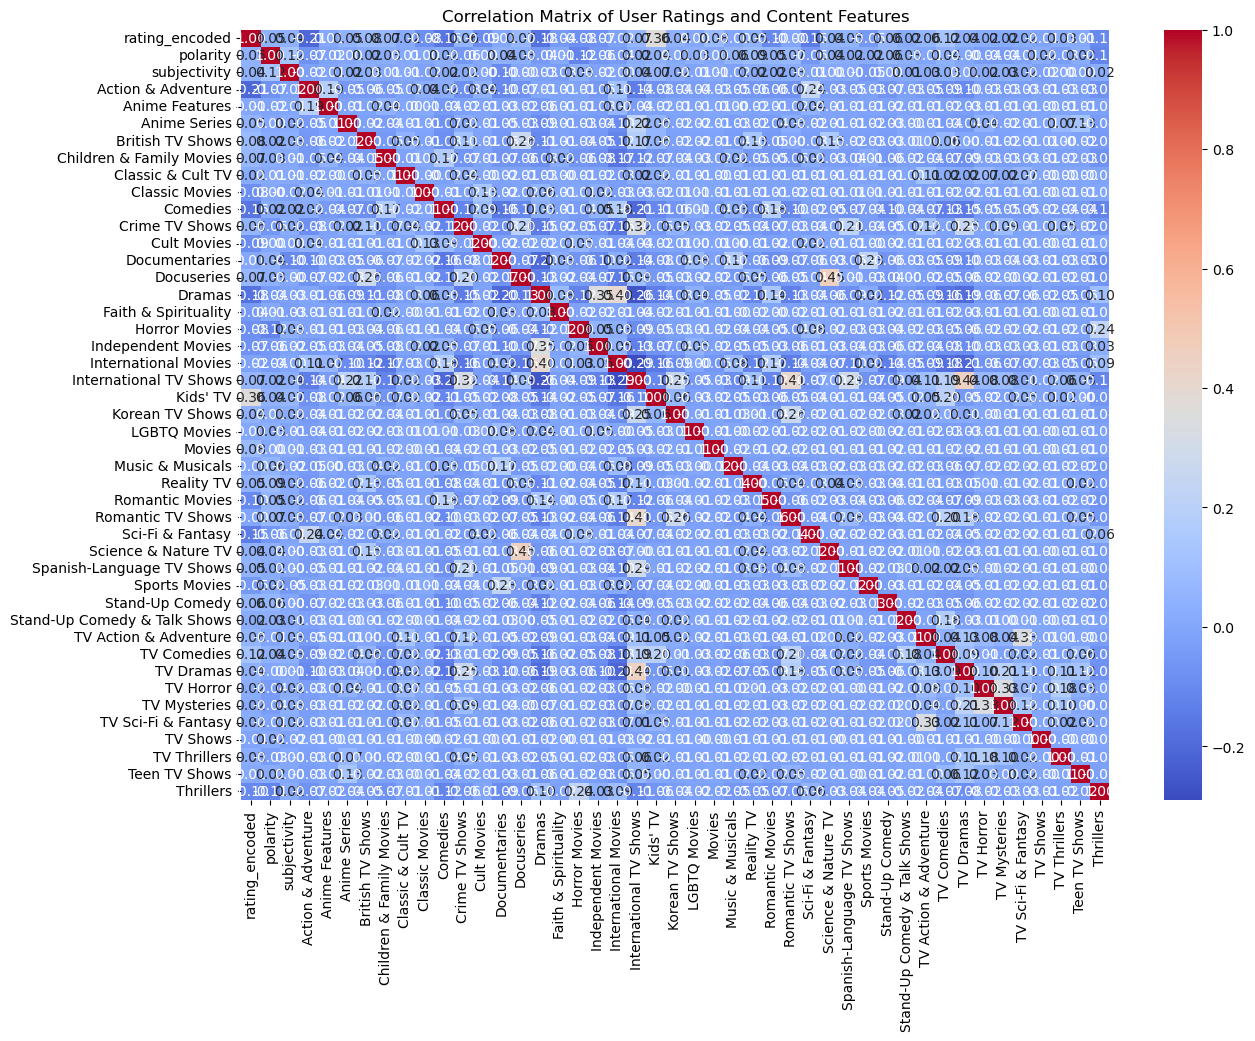


Top Factors Correlated with User Ratings:
rating_encoded                  1.000000
Kids' TV                        0.362389
TV Comedies                     0.120474
Movies                          0.081199
British TV Shows                0.079395
Children & Family Movies        0.072791
Docuseries                      0.071448
International TV Shows          0.067131
Stand-Up Comedy                 0.063779
Crime TV Shows                  0.058025
TV Action & Adventure           0.056078
Spanish-Language TV Shows       0.052498
Anime Series                    0.051270
Reality TV                      0.046657
polarity                        0.045891
Science & Nature TV             0.043990
subjectivity                    0.042738
TV Dramas                       0.041315
Korean TV Shows                 0.038263
TV Thrillers                    0.027223
TV Horror                       0.023463
TV Sci-Fi & Fantasy             0.022720
Stand-Up Comedy & Talk Shows    0.021489
Classic & Cult

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob


# Fill missing values
netflix_data['rating'] = netflix_data['rating'].fillna('Unknown')
netflix_data['description'] = netflix_data['description'].fillna('')

# Sentiment Analysis on Descriptions
netflix_data['polarity'] = netflix_data['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
netflix_data['subjectivity'] = netflix_data['description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# One-hot encode genres
genres_split = netflix_data['listed_in'].str.get_dummies(sep=', ')
netflix_data = pd.concat([netflix_data, genres_split], axis=1)

# Encode Ratings
le = LabelEncoder()
netflix_data['rating_encoded'] = le.fit_transform(netflix_data['rating'])

# Extract features for correlation analysis
correlation_features = ['rating_encoded', 'polarity', 'subjectivity'] + list(genres_split.columns)
correlation_data = netflix_data[correlation_features]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of User Ratings and Content Features')
plt.show()

# Identify top correlating factors
rating_corr = correlation_matrix['rating_encoded'].sort_values(ascending=False)
print("\nTop Factors Correlated with User Ratings:")
print(rating_corr)
